In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

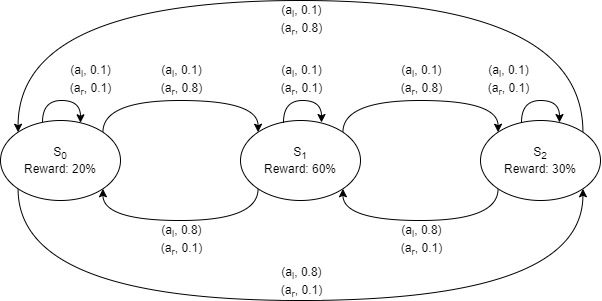

In [2]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [3]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + (-1 if a == 0 else 1)) % STATE_COUNT # Left and right movement
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.1, 0.1, 0.8],
       [0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1]])

In [4]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [5]:
REWARD_PROBS = [0.2, 0.6, 0.3]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p,:] = REWARD_PROBS[s_p]
        
reward_table

array([[[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]],


       [[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]],


       [[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]]])

In [6]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = Model(states=states,
              actions=actions,
              observations=observations,
              transitions=transition_table,
              rewards=reward_table,
              observation_table=observation_table,
              rewards_are_probabilistic=True)

[10/14/2023, 00:49:01] Instantiation of MDP Model:
[10/14/2023, 00:49:01] - 3 states
[10/14/2023, 00:49:01] - 2 actions
[10/14/2023, 00:49:01] - Starting generation of transitions table
[10/14/2023, 00:49:01]     > Done in 0.000s
[10/14/2023, 00:49:01] - Generation of state grid
[10/14/2023, 00:49:01] - Generating start probabilities table
[10/14/2023, 00:49:01] - Starting computation of reachable states from transition data
[10/14/2023, 00:49:01]     > Done in 0.000s
[10/14/2023, 00:49:01] - At most 3 reachable states per state-action pair
[10/14/2023, 00:49:01] - Starting computation of reachable state probabilities from transition data
[10/14/2023, 00:49:01]     > Done in 0.000s
[10/14/2023, 00:49:01] POMDP particular parameters:
[10/14/2023, 00:49:01] - 3 observations
[10/14/2023, 00:49:01] - Starting of transitional observations for reachable states table
[10/14/2023, 00:49:01]     > Done in 0.000s
[10/14/2023, 00:49:01] - Starting generation of expected rewards table
[10/14/2023,

## Solving

In [7]:
solver = PBVI_Solver()

In [8]:
value_function, solve_history = solver.solve(model,8,4,history_tracking_level=2)

Expansions:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 0:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 1:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 2:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 3:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 4:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 5:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 6:   0%|          | 0/4 [00:00<?, ?it/s]

Backups 7:   0%|          | 0/4 [00:00<?, ?it/s]

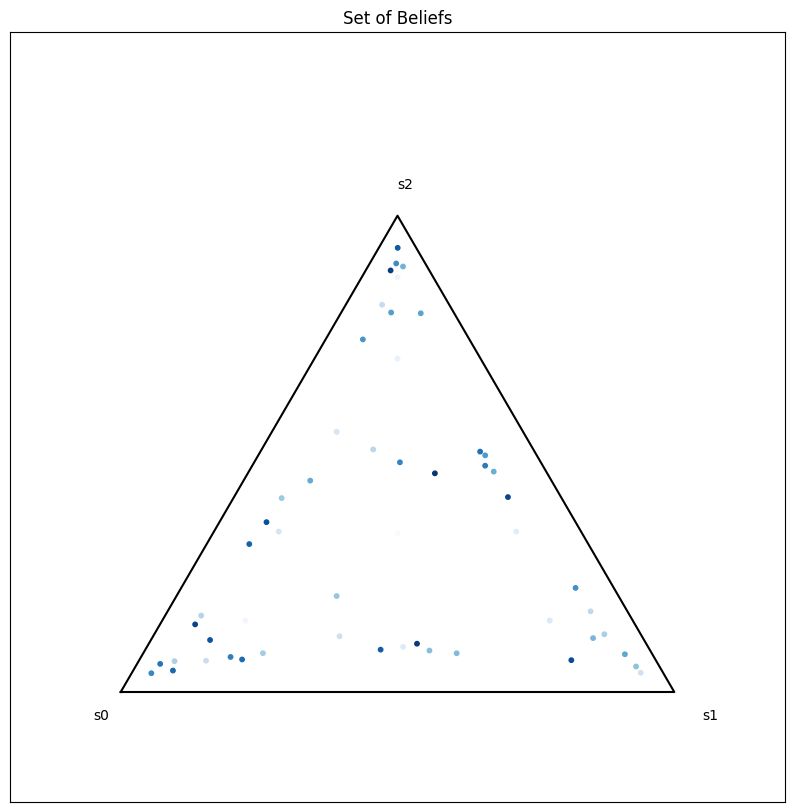

In [9]:
solve_history.plot_belief_set(10)

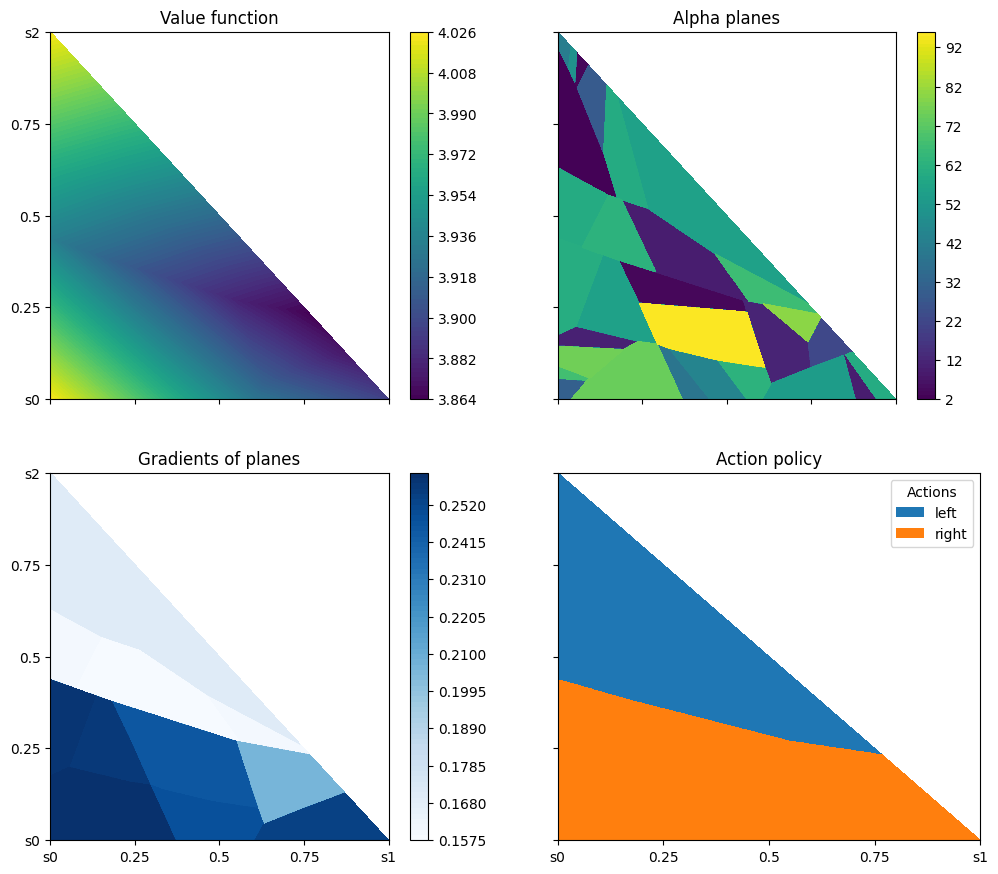

In [10]:
solve_history.plot_solution(3, plot_belief=False)

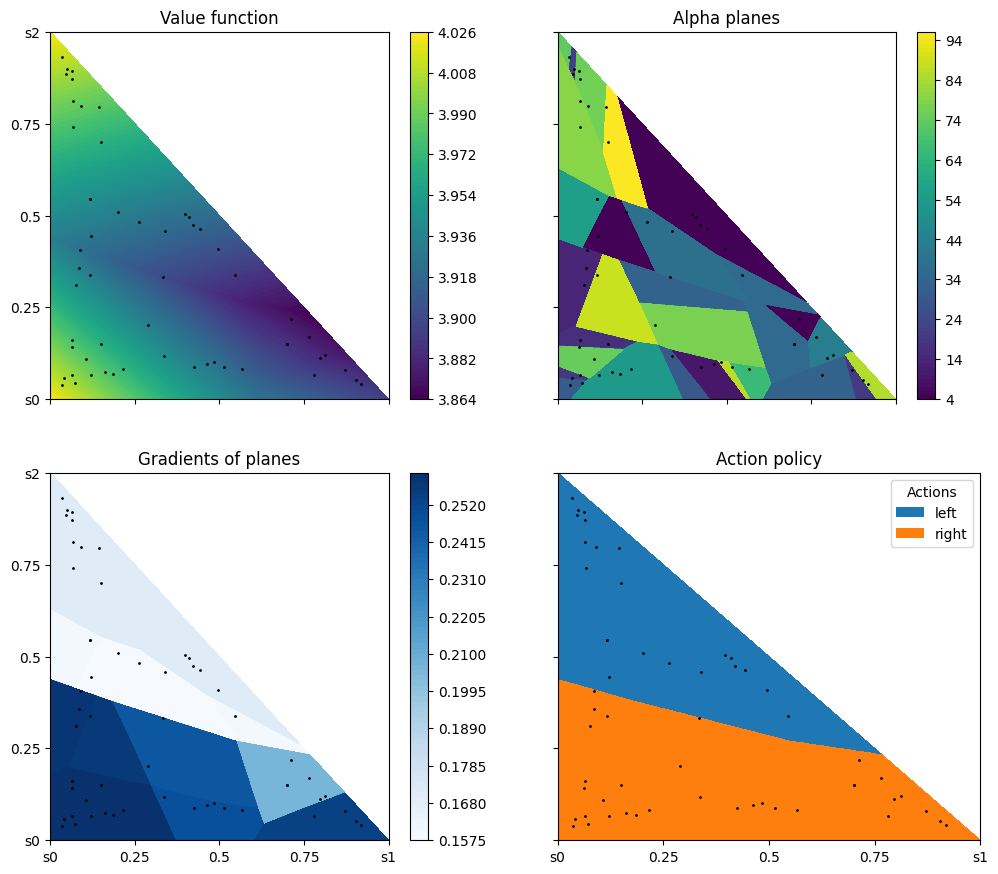

In [12]:
value_function.plot(as_grid=False, size=3, belief_set=solve_history.explored_beliefs)